<a href="https://colab.research.google.com/github/Priyam145/MLprojects/blob/main/notebooks/LinearRegression_maths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np

In [50]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

(0.0, 11.077862122046168)

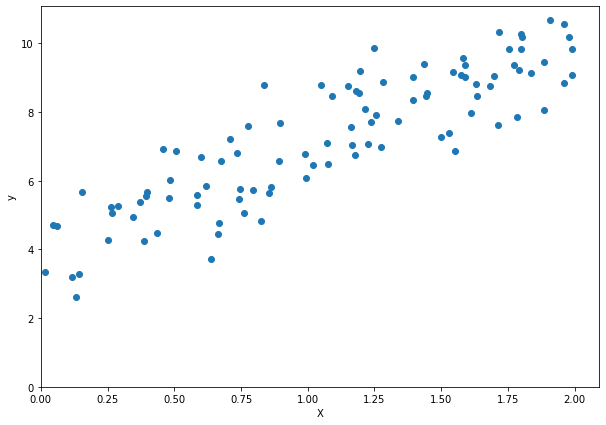

In [52]:
fig, axs = plt.subplots(figsize=(10, 7))
fig.set_facecolor("white")
plt.scatter(X, y);
axs.set_xlabel('X')
axs.set_ylabel('y')
axs.set_xlim(xmin=0)
axs.set_ylim(ymin=0)

In [53]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [54]:
X_b[:5]

array([[1.        , 1.63213209],
       [1.        , 1.79887713],
       [1.        , 1.6835256 ],
       [1.        , 0.15395838],
       [1.        , 1.58778995]])

In [55]:
theta_best

array([[3.97280617],
       [3.02271872]])

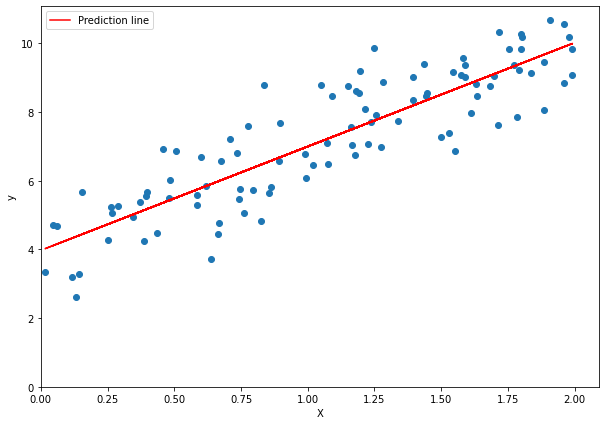

In [56]:
fig, axs = plt.subplots(figsize=(10, 7))
fig.set_facecolor("white")
plt.scatter(X, y);
plt.plot(X, X_b.dot(theta_best), color='red', label='Prediction line')
axs.set_xlabel('X')
axs.set_ylabel('y')
axs.set_xlim(xmin=0)
axs.set_ylim(ymin=0)
plt.legend();

In [57]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.97280617],
       [10.01824361]])

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.97280617]), array([[3.02271872]]))

In [60]:
lin_reg.predict(X_new)

array([[ 3.97280617],
       [10.01824361]])

In [61]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.97280617],
       [3.02271872]])

In [62]:
np.linalg.pinv(X_b).dot(y)

array([[3.97280617],
       [3.02271872]])

In [63]:
eta = 0.1
n_iterations = 1000
m = 100

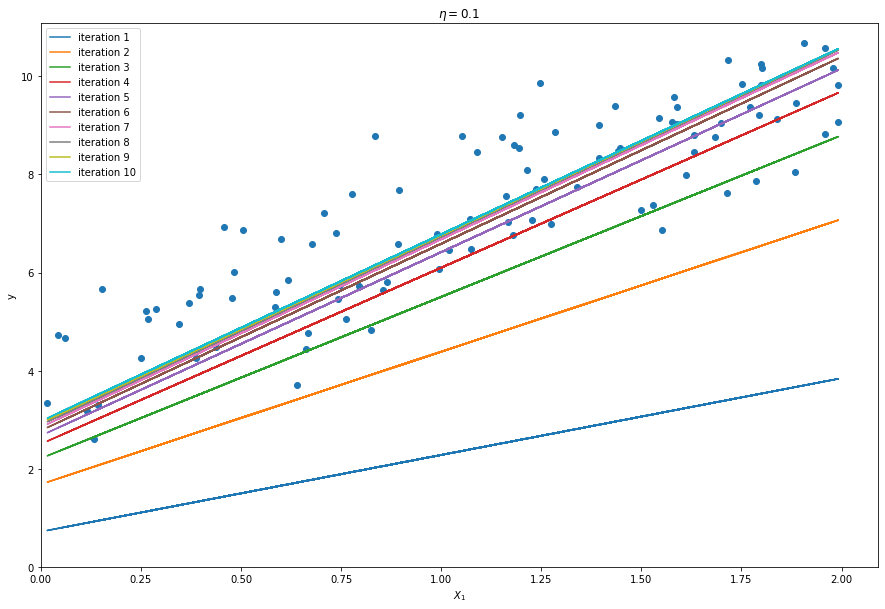

In [64]:
fig, axs = plt.subplots(figsize=(15, 10))
fig.set_facecolor("white")
plt.scatter(X, y);
axs.set_xlabel(r'$X_1$')
axs.set_ylabel('y')
axs.set_xlim(xmin=0)
axs.set_ylim(ymin=0)

theta = np.random.randn(2, 1)
for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    if iteration < 10:
        plt.plot(X, X_b.dot(theta), label=f'iteration {iteration+1}')

axs.set_title('{eta}'.format(eta=r'$\eta = 0.1$'))
plt.legend();

In [65]:
theta

array([[3.97280617],
       [3.02271872]])

# Stochastic Gradient Descent

In [66]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparamters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [67]:
theta

array([[4.00183437],
       [3.00553301]])

In [68]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [69]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.88613531]), array([2.90916178]))

# Mini-Batch Gradient Descent

# Polynomial Regression

In [70]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

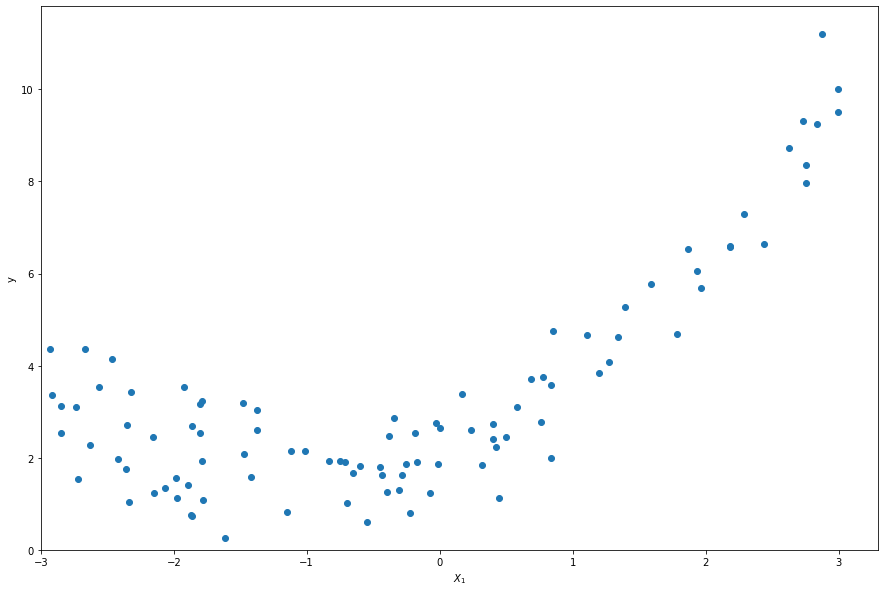

In [71]:
fig, axs = plt.subplots(figsize=(15, 10))
fig.set_facecolor("white")
plt.scatter(X, y);
axs.set_xlabel(r'$X_1$')
axs.set_ylabel('y')
axs.set_xlim(xmin=-3)
axs.set_ylim(ymin=0);

In [72]:
from sklearn.preprocessing import PolynomialFeatures

In [73]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.11738458])

In [74]:
X_poly[0]

array([-1.11738458,  1.24854829])

In [75]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.09381459]), array([[1.06644267, 0.51020421]]))

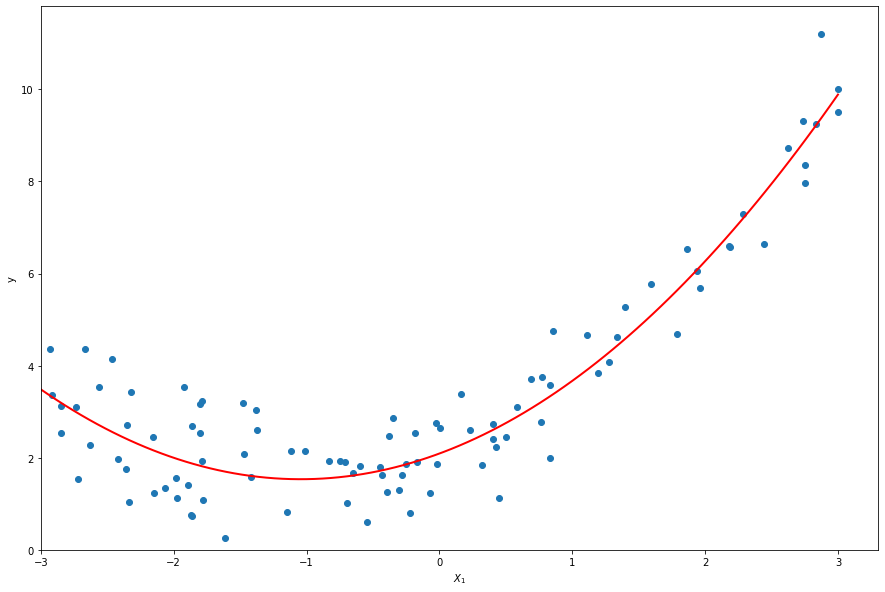

In [76]:
fig, axs = plt.subplots(figsize=(15, 10))
fig.set_facecolor("white")
plt.scatter(X, y)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
axs.set_xlabel(r'$X_1$')
axs.set_ylabel('y')
axs.set_xlim(xmin=-3)
axs.set_ylim(ymin=0);

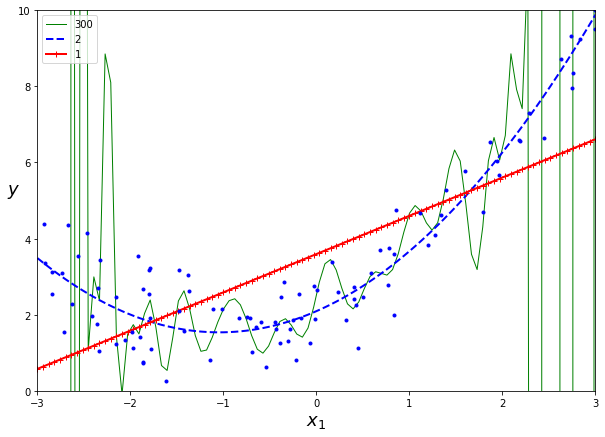

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

fig, axs = plt.subplots(figsize=(10, 7))
fig.set_facecolor('white')

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

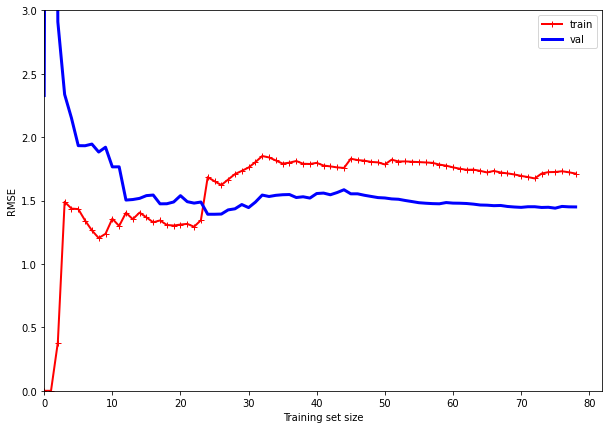

In [78]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    fig, axs = plt.subplots(figsize=(10, 7))
    fig.set_facecolor('white')

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    axs.set_xlabel('Training set size')
    axs.set_ylabel('RMSE')
    axs.set_xlim(xmin=0)
    axs.set_ylim(ymin=0, ymax=3.0)
    plt.legend()

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [79]:
from sklearn.pipeline import Pipeline

In [80]:
polynomial_regression = Pipeline([
            ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
            ("lin_reg", LinearRegression())
])

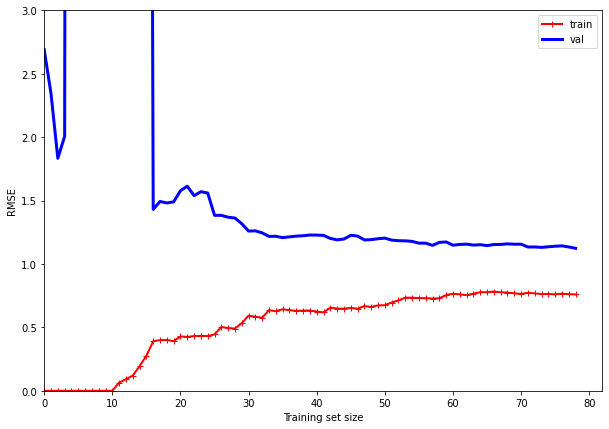

In [81]:
plot_learning_curves(polynomial_regression, X, y)

# Ridge Regression